## Задание

1. Загрузите данные из файла abalone.csv. Это датасет, в котором требуется предсказать возраст ракушки (число колец) по физическим измерениям.
2. Преобразуйте признак Sex в числовой: значение F должно перейти в -1, I — в 0, M — в 1. 
3. Разделите содержимое файлов на признаки и целевую переменную. В последнем столбце записана целевая переменная, в остальных — признаки.
4. Обучите случайный лес (sklearn.ensemble.RandomForestRegressor) с различным числом деревьев: от 1 до 50 (не забудьте выставить "random_state=1" в конструкторе). Для каждого из вариантов оцените качество работы полученного леса на кросс-валидации по 5 блокам. Используйте параметры "random_state=1" и "shuffle=True" при создании генератора кросс-валидации sklearn.cross_validation.KFold. В качестве меры качества воспользуйтесь коэффициентом детерминации (sklearn.metrics.r2_score).
5. Определите, при каком минимальном количестве деревьев случайный лес показывает качество на кросс-валидации выше 0.52. Это количество и будет ответом на задание.
6. Обратите внимание на изменение качества по мере роста числа деревьев. Ухудшается ли оно?


Загрузим данные и посмотрим на них

In [1]:
import pandas
data = pandas.read_csv('abalone.csv')

In [2]:
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Преобразуем признак "Sex"

In [3]:
data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))

Разделим содержимое файлов на признаки и целевую переменную

In [4]:
X = data.loc[:, 'Sex':'ShellWeight']
y = data['Rings']

In [5]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=1)

Обучим случайный лес с различным числом деревьев: от 1 до 50 и создадим список оценок качества для дальнейшей работы

In [6]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor

score = []
for i in range(1, 51, 1):
    regr = RandomForestRegressor(n_estimators=i, random_state=1)
    regr.fit(X, y)
    score.append(np.mean(cross_val_score(regr, X, y, cv=kf, scoring='r2')))

Найдем ответ на вопрос №5

In [7]:
answer = 1
for i in range(len(score)):
    if score[i] >= 0.52:
        answer = i + 1
        break

In [8]:
answer

22

При увеличении количества деревьев от 1 до 10 качество растет довольно быстро. До 22 рост качества замедляется. После 22 деревьев качество практически не растет - остается на уровне 0.52-0.53

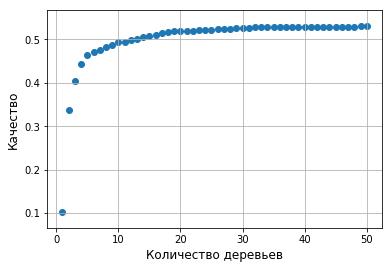

In [9]:
import matplotlib.pyplot as plt

x = range(1, 51, 1)
y = score

plt.xlabel(u'Количество деревьев', fontsize=12)
plt.ylabel(u'Качество', fontsize=12)
plt.grid(True)
plt.scatter(x, y)
plt.show()